This notebook is my first attempt to make "final" (i.e. prettier) figures for the IBD case study.

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

sns.set_palette('muted')

This plot will have a top row that's the abundance of butyrate producing bacteria in each donor sample for the three studies, and a bottom row that has the abundance of butyrate producers split by yes/no FMT response.

Also for the studies which measured FMT response at different times or in different ways, we'll also make all of those figures here.

# Main figure

In [11]:
# File names for donor butyrate abundance
fjacob = '../../data/analysis/butyrate_producers.jacob2017.txt'
fgoyal = '../../data/analysis/butyrate_producers.goyal2018.txt'
fkump = '../../data/analysis/butyrate_producers.kump2018.txt'

donorbut_jacob = pd.read_csv(fjacob, sep='\t')
donorbut_goyal = pd.read_csv(fgoyal, sep='\t')
donorbut_kump = pd.read_csv(fkump, sep='\t')

donorbut_kump = donorbut_kump.query('Sampling_day == "average"')

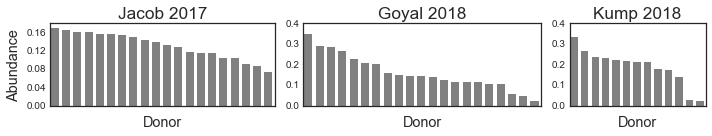

In [144]:
#plt.style.use('seaborn-white')

total_width = 10
height = 2

xlabel = 'Donor'
ylabel = 'Abundance'

# Set up gridspec
n_jacob = int(donorbut_jacob.shape[0])
n_goyal = int(donorbut_goyal.shape[0])
n_kump = int(donorbut_kump.shape[0])

fig = plt.figure(figsize=(total_width, height))

# Top panel: abundance of butyrate producers in all donors
gs = gridspec.GridSpec(nrows=1, ncols=n_jacob + n_goyal + n_kump, 
                       wspace=0.5,
                       top=0.97, bottom=0.65)

ax = plt.subplot(gs[:n_jacob])
#donorbut_jacob.sort_values(by='butyrate_abun', ascending=False)['butyrate_abun'].plot(kind='bar', color='gray', width=0.8)
ax.bar(range(n_jacob), 
       donorbut_jacob.sort_values(by='butyrate_abun', ascending=False)['butyrate_abun'].values,
       color='gray')
ax.set_xlabel(xlabel, fontsize='x-large')
ax.set_xlim([0, n_jacob])
ax.set_xticks([float(i) + 0.5 for i in range(n_jacob)])
ax.set_xticklabels('')
#ax.tick_params(axis='x', which='both', direction='out', length=2.5, top=False)

ax.set_ylabel(ylabel, fontsize='x-large')
ax.set_yticks(ax.get_yticks()[::2])
ax.set_title('Jacob 2017', fontsize='xx-large')

ax = plt.subplot(gs[n_jacob:(n_jacob + n_goyal)])
#donorbut_goyal.sort_values(by='butyrate_abun', ascending=False)['butyrate_abun'].plot(kind='bar', color='gray', width=0.8)
ax.bar(range(n_goyal), 
       donorbut_goyal.sort_values(by='butyrate_abun', ascending=False)['butyrate_abun'].values,
       color='gray')
ax.set_xlim([0, n_goyal])
ax.set_xlabel(xlabel, fontsize='x-large')
ax.set_xticks([float(i) + 0.5 for i in range(n_goyal)])
ax.set_xticklabels('')
#ax.tick_params(axis='x', which='both', direction='out', length=2.5, top=False)

ax.set_ylabel('')
ax.set_yticks(ax.get_yticks()[::2])
ax.set_title('Goyal 2018', fontsize='xx-large')

ax = plt.subplot(gs[(n_jacob + n_goyal):])
#donorbut_kump.sort_values(by='butyrate_abun', ascending=False)['butyrate_abun'].plot(kind='bar', color='gray', width=0.8)
ax.bar(range(n_kump), 
       donorbut_kump.sort_values(by='butyrate_abun', ascending=False)['butyrate_abun'].values,
       color='gray')
ax.set_xlabel(xlabel, fontsize='x-large')
ax.set_xlim([0, n_kump])
ax.set_xticks([float(i) + 0.5 for i in range(n_kump)])
ax.set_xticklabels('')
#ax.tick_params(axis='x', which='both', direction='out', length=2.5, top=False)
ax.set_ylabel('')
ax.set_yticks(ax.get_yticks()[::2])
ax.set_title('Kump 2018', fontsize='xx-large')

gs.tight_layout(fig)

fig.savefig('../../figures/final/fig2.donor_butyrate_abun.png')

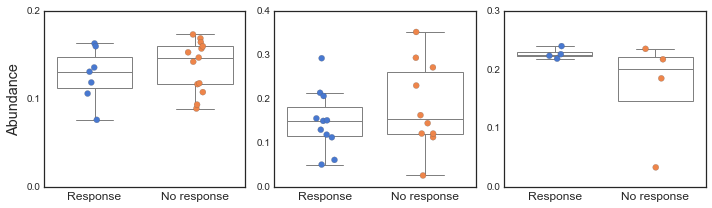

In [145]:
# Bottom panel: abundance of butyrate producers vs. FMT response
total_width = 10
height = 3

fig = plt.figure(figsize=(total_width, height))

gs = gridspec.GridSpec(nrows=1, ncols=3, 
                       wspace=0.5,
                       top=0.55, bottom=0.05)

boxprops = {'edgecolor': 'gray', 'facecolor': 'w'}
lineprops = {'color': 'gray'}
boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 'capprops': lineprops,
                       'width': 0.75})

# Jacob 2017
ax = plt.subplot(gs[0])
sns.boxplot(data=donorbut_jacob, x='response_w4', y='butyrate_abun', ax=ax,
              order=['Yes', 'No'],
            fliersize=0,
            **boxplot_kwargs)
sns.stripplot(data=donorbut_jacob, x='response_w4', y='butyrate_abun', ax=ax,
              order=['Yes', 'No'],
              size=6, linewidth=0.2)
#ax.set_title('Response W4')
ax.set_xlabel('')
ax.set_ylabel('Abundance', fontsize='x-large')
ax.set_xticklabels(['Response', 'No response'], fontsize='large')

ax.set_ylim([0, None])
ax.set_yticks(ax.get_yticks()[::2])


# Goyal 2018
ax = plt.subplot(gs[1])
sns.boxplot(data=donorbut_goyal, x='response_m6', y='butyrate_abun', ax=ax,
            order=[True, False],
            fliersize=0,
            **boxplot_kwargs)
sns.stripplot(data=donorbut_goyal, x='response_m6', y='butyrate_abun', ax=ax,
              order=[True, False],
              size=6, linewidth=0.2)
#ax.set_title('Response M6')
ax.set_xlabel('')
ax.set_xticklabels(['Response', 'No response'], fontsize='large')

ax.set_ylim([0, None])
ax.set_ylabel('')
ax.set_yticks(ax.get_yticks()[::2])


# Kump 2018
ax = plt.subplot(gs[2])
sns.boxplot(data=donorbut_kump, x='Response', y='butyrate_abun', ax=ax,
            order=['RE', 'NR'],
            fliersize=0,
            **boxplot_kwargs)
sns.stripplot(data=donorbut_kump, x='Response', y='butyrate_abun', ax=ax,
              order=['RE', 'NR'],
              size=6, linewidth=0.2)
#ax.set_title('Response')
ax.set_xlabel('')
ax.set_xticklabels(['Response', 'No response'], fontsize='large')

ax.set_ylim([0, None])
ax.set_ylabel('')
ax.set_yticks(ax.get_yticks()[::2])

gs.tight_layout(fig)

fig.savefig('../../figures/final/fig2.butyrate_vs_response.png')